In [1]:
from scipy.special import erfinv
from scipy.special import loggamma
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy import special
from scipy import stats
import numpy as np
import pandas as pd
import sys
import math
from matplotlib import pyplot as plt
import seaborn as sns
import random
from scipy.ndimage import laplace
from scipy.ndimage import gaussian_filter
from scipy.special import binom
from scipy.fft import fft2
random.seed(1234)

In [2]:
plt.rcParams.update({'lines.markersize': 12})

In [5]:
def get_all_indices(rows,cols):
    indices = []
    for i in range(rows):
        for j in range(cols):
            indices.append((i, j))
    return indices

def get_theory_values(s_list=[1e-3,1e-2,1e-1],L=1,l=1,m=1e-3,Nd=1000,mu=1e-8):
    k_list = get_all_indices(L,L)
    Ntot = Nd*(L/l)**2
    ak_list = [m*(l**2)*((2*np.pi/L)**2)*(np.linalg.norm(k)**2) for k in k_list]
    result = np.zeros((len(s_list),len(k_list)))
    result_mean = np.zeros(len(s_list))
    for i in range(len(s_list)):
        for j in range(len(k_list)):
            result[i,j] = Ntot*mu*(1/s_list[i])*(1/(s_list[i]+ak_list[j]))
            if k_list[j]==(0,0):
                result_mean[i] = Ntot*mu*(1/s_list[i])
    return result_mean, result


## Single Deme

In [60]:
### read in data from simulations
list1 = pd.read_csv('L1_list1.csv',header=None) ## list of E[|C(k)|] **list1**
list2 = pd.read_csv('L1_list2.csv',header=None) ## list of |E[C(k)]|^2 **list2**
list3 = pd.read_csv('L1_list3.csv',header=None) ## list of E[|C(k)|^2] **list3**
times = np.array(pd.read_csv('L1_times.csv',header=None)) ## list of avereage times to extinction for each s
kvals = np.array(pd.read_csv('L1_k_list.csv',header=None)) ## indices of demes
times = [sublist[0] for sublist in times]

Check #1: simulation values in list 1 (at $\mathbf{k}=(0,0)$) multiplied by mean time to extinction should be proportional to the theoretical value for the expected total number of mutant alleles.

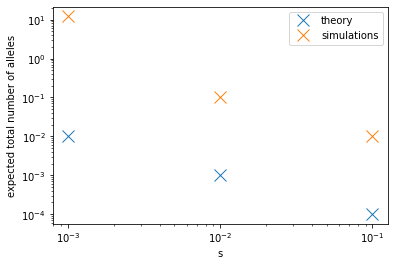

In [64]:
list1_adj = [np.array(list1)[i]*times[i] for i in range(len(times))]
result_mean, result = get_theory_values(L=1)
svals = [1e-3,1e-2,1e-1]
plt.plot(svals,result_mean,marker='x',linestyle='',label="theory")
plt.plot(svals,list1_adj,marker='x',linestyle='',label="simulations")
plt.legend()
plt.xlabel("s")
plt.ylabel("expected total number of alleles")
plt.xscale('log')
plt.yscale('log')

_Note: still need to adjust formutation rate and other constants of proportionality. For the two stronger selection coefficients the results look proportional but not for the weakest._

Check #2: simulation values in list 2 should be zero when $\mathbf{k}\neq(0,0)$. Not applicable here, but check in higher orders.

Check #3: simulation values in list 3 multiplied by the mean time to extinction should be proportional to theoretical values given in `result` when $\mathbf{k}\neq(0,0)$. Not applicable here, but check in higher orders.

## L=2

In [65]:
### read in data from simulations
list1 = pd.read_csv('L2_list1.csv',header=None) ## list of E[|C(k)|] **list1**
list2 = pd.read_csv('L2_list2.csv',header=None) ## list of |E[C(k)]|^2 **list2**
list3 = pd.read_csv('L2_list3.csv',header=None) ## list of E[|C(k)|^2] **list3**
times = np.array(pd.read_csv('L2_times.csv',header=None)) ## list of avereage times to extinction for each s
kvals = np.array(pd.read_csv('L2_k_list.csv',header=None)) ## indices of demes
times = [sublist[0] for sublist in times]

Check #1: simulation values in list 1 (at $\mathbf{k}=(0,0)$) multiplied by mean time to extinction should be proportional to the theoretical value for the expected total number of mutant alleles.

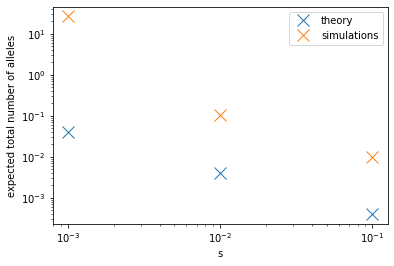

In [72]:
list1_adj = [np.array(list1[0])[i]*times[i] for i in range(len(times))]
result_mean, result = get_theory_values(L=2)
svals = [1e-3,1e-2,1e-1]
plt.plot(svals,result_mean,marker='x',linestyle='',label="theory")
plt.plot(svals,list1_adj,marker='x',linestyle='',label="simulations")
plt.legend()
plt.xlabel("s")
plt.ylabel("expected total number of alleles")
plt.xscale('log')
plt.yscale('log')

_Note: still need to adjust formutation rate and other constants of proportionality. For the two stronger selection coefficients the results look proportional but not for the weakest._

Check #2: simulation values in list 2 should be zero when $\mathbf{k}\neq(0,0)$. 

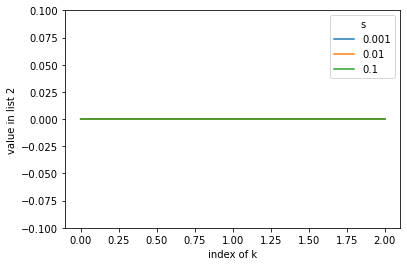

In [101]:
for i in range(3):
    plt.plot(range(3),np.array(list2)[i][1:],label=str(svals[i]))
plt.xlabel("index of k")
plt.ylabel("value in list 2")
plt.ylim(-.1,.1)
plt.legend(title="s")

Check #3: simulation values in list 3 multiplied by the mean time to extinction should be proportional to theoretical values given in `result` when $\mathbf{k}\neq(0,0)$. 

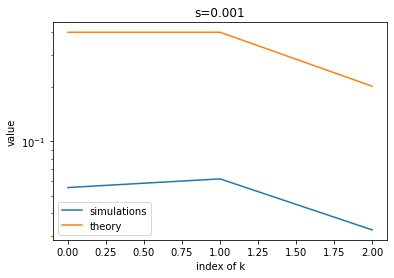

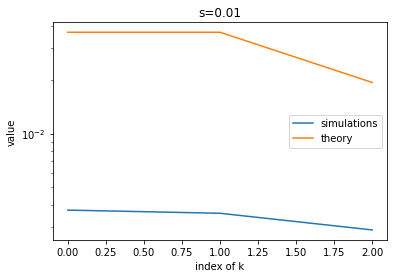

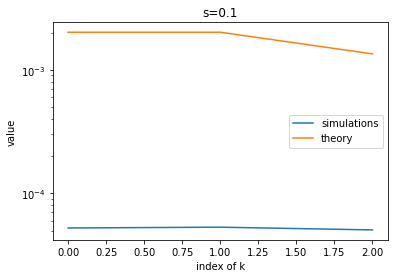

In [127]:
list3_s0 = np.array(list3)[0,:]
list3_s1 = np.array(list3)[1,:]
list3_s2 = np.array(list3)[2,:]

lists = [list3_s0,list3_s1,list3_s2]

# list3_s0*times[0]

for i in range(len(svals)):
    plt.plot(range(3),(lists[i]*times[i])[1:],label="simulations")
    plt.plot(range(3),result[i][1:],label="theory")
    plt.yscale('log')
    plt.xlabel("index of k")
    plt.ylabel("value")
    plt.legend()
    plt.title("s="+str(svals[i]))
    plt.show()
    

## L=10

In [128]:
### read in data from simulations
list1 = pd.read_csv('L10_list1.csv',header=None) ## list of E[|C(k)|] **list1**
list2 = pd.read_csv('L10_list2.csv',header=None) ## list of |E[C(k)]|^2 **list2**
list3 = pd.read_csv('L10_list3.csv',header=None) ## list of E[|C(k)|^2] **list3**
times = np.array(pd.read_csv('L10_times.csv',header=None)) ## list of avereage times to extinction for each s
kvals = np.array(pd.read_csv('L10_k_list.csv',header=None)) ## indices of demes
times = [sublist[0] for sublist in times]

Check #1: simulation values in list 1 (at $\mathbf{k}=(0,0)$) multiplied by mean time to extinction should be proportional to the theoretical value for the expected total number of mutant alleles.

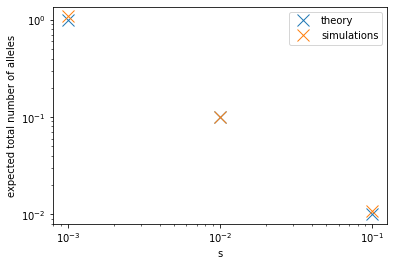

In [135]:
list1_adj = [np.array(list1[0])[i]*times[i] for i in range(len(times))]
result_mean, result = get_theory_values(L=10)
svals = [1e-3,1e-2,1e-1]
plt.plot(svals,result_mean,marker='x',linestyle='',label="theory")
plt.plot(svals,list1_adj,marker='x',linestyle='',label="simulations")
plt.legend()
plt.xlabel("s")
plt.ylabel("expected total number of alleles")
plt.xscale('log')
plt.yscale('log')

_Note: looks better here even without more adjustment?_

Check #2: simulation values in list 2 should be zero when $\mathbf{k}\neq(0,0)$. 

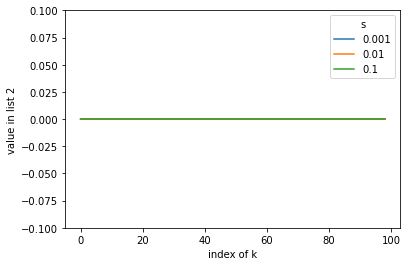

In [132]:
for i in range(3):
    plt.plot(range(99),np.array(list2)[i][1:],label=str(svals[i]))
plt.xlabel("index of k")
plt.ylabel("value in list 2")
plt.ylim(-.1,.1)
plt.legend(title="s")

Check #3: simulation values in list 3 multiplied by the mean time to extinction should be proportional to theoretical values given in `result` when $\mathbf{k}\neq(0,0)$. 

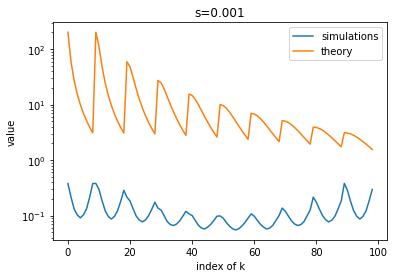

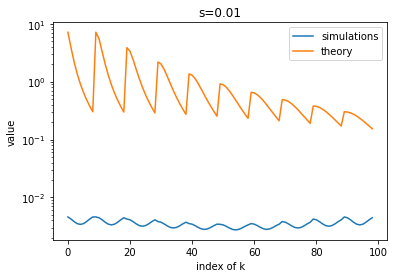

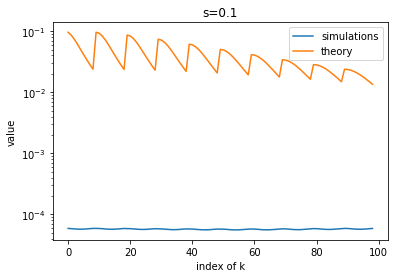

In [138]:
list3_s0 = np.array(list3)[0,:]
list3_s1 = np.array(list3)[1,:]
list3_s2 = np.array(list3)[2,:]

lists = [list3_s0,list3_s1,list3_s2]

# list3_s0*times[0]

for i in range(len(svals)):
    plt.plot(range(99),(lists[i]*times[i])[1:],label="simulations")
    plt.plot(range(99),result[i][1:],label="theory")
    plt.yscale('log')
    plt.xlabel("index of k")
    plt.ylabel("value")
    plt.legend()
    plt.title("s="+str(svals[i]))
#     plt.ylim(1e-5,1e3)
    plt.show()
    

_Note: pattern sort of follows?_